# Análise de resíduos
Índice <a name="topo"></a>

1. [Padrão esperado de resíduos](#1)
2. [Padrão côncavo](#2)
3. [Padrão convexo](#3)
4. [Padrão de variância crescente](#4)
5. [Transformações em x](#5)

In [287]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.formula.api as smf
%matplotlib inline
plt.rc('figure', figsize=(6, 4))

### 1. Padrão esperado de resíduos<a name="1"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

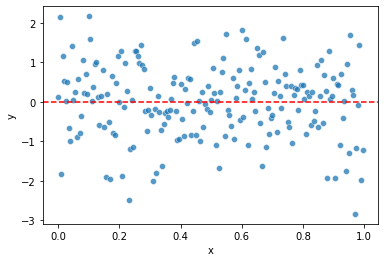

In [288]:
df = pd.DataFrame({'y':np.random.randn(200), 'x':np.arange(0,1,.005)})

sns.scatterplot(x = 'x', y = 'y', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

### 2. Padrão côncavo<a name="2"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

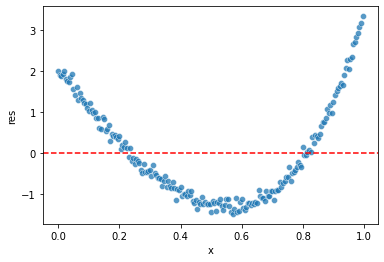

In [289]:
df['y'] = np.exp(2.5*(df['x']-(df['x'].min()-.1))) + np.random.randn(200)*.1
df['y'] = df['y'] - df['y'].mean()

reg = smf.ols('y ~ x', data = df).fit()
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

<AxesSubplot:xlabel='x', ylabel='y'>

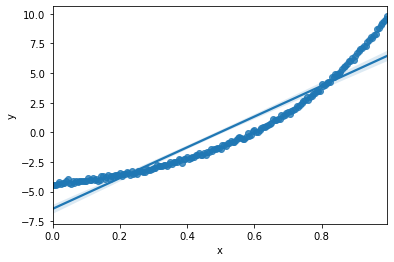

In [290]:
sns.regplot(x = 'x', y = 'y', data = df)

### 3. Padrão convexo<a name="3"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

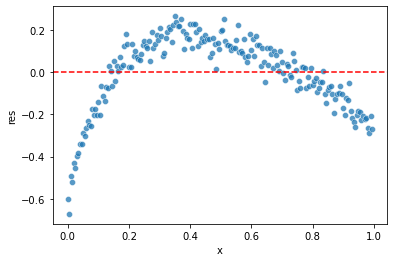

In [291]:
df['y'] = np.log((df['x']-(df['x'].min()-.1))) + np.random.randn(200)*.05
df['y'] = df['y'] - df['y'].mean()

reg = smf.ols('y ~ x', data = df).fit()
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')



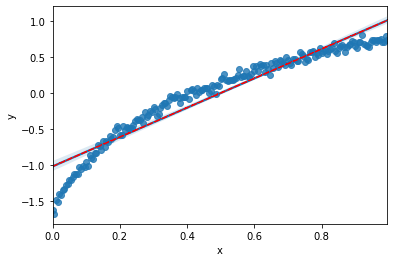

In [292]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], reg.fittedvalues, 'r,--')

### 4. Padrão de variância crescente<a name="4"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

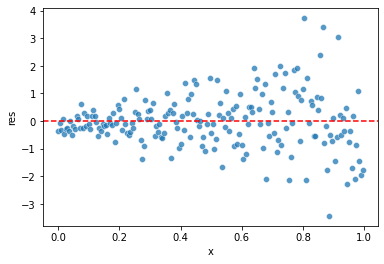

In [293]:
df['y'] = 5*(df['x']-(df['x'].min()-.1)) + (df['x']-(df['x'].min()-.1))*np.random.randn(200)*1.5

reg = smf.ols('y ~ x', data = df).fit()
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

<AxesSubplot:xlabel='x', ylabel='y'>

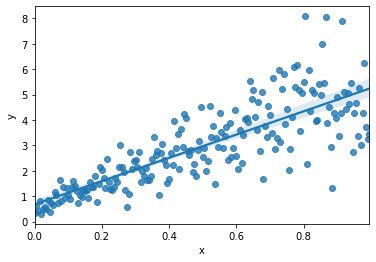

In [294]:
sns.regplot(x = 'x', y = 'y', data = df)

### 5. Transformações em x<a name="5"></a>
<div style="text-align: right"
     
[Voltar ao índice](#topo)</div>
    
Uma forma de buscar um melhor ajuste em uma regressão com padrão de relação não linear entre x e y é buscar uma função g(x) que linearize essa relação. Dentre as opções, podemos tentar:
- categorizar x
- ajustar um polinômio
- transformar por uma função log, exponencial, raiz etc.

<AxesSubplot:xlabel='x', ylabel='y'>

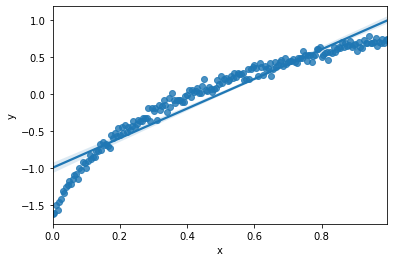

In [299]:
df['y'] = np.log((df['x']-(df['x'].min()-.1))) + np.random.randn(200)*.05
df['y'] = df['y'] - df['y'].mean()
sns.regplot(x = 'x', y = 'y', data = df)

A regressão com a variável ```x``` "crua" resulta em padrâo convexo nos resíduos

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     2049.
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          2.15e-106
Time:                        12:48:49   Log-Likelihood:                 59.501
No. Observations:                 200   AIC:                            -115.0
Df Residuals:                     198   BIC:                            -108.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9963      0.025    -39.153      0.0

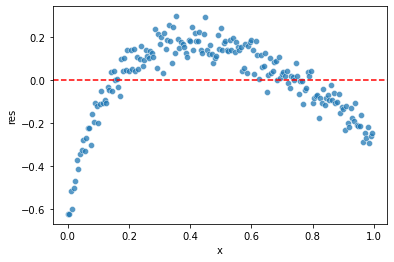

In [302]:
reg = smf.ols('y ~ x', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')


#### Ajustando um polinômio de segundo grau

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5621.
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.78e-174
Time:                        12:50:45   Log-Likelihood:                 222.76
No. Observations:                 200   AIC:                            -439.5
Df Residuals:                     197   BIC:                            -429.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.3514      0.017    -80.

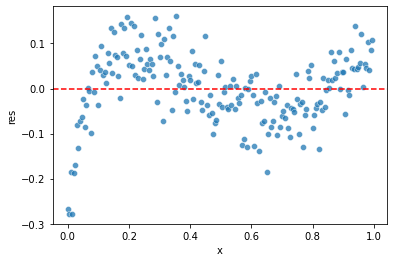

In [304]:
reg = smf.ols('y ~ x', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

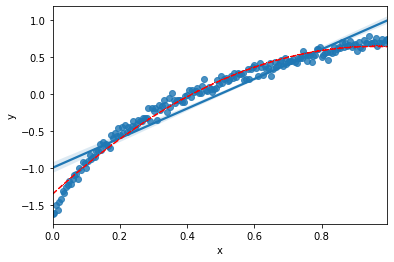

In [305]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], reg.fittedvalues, 'r,--')

#### Ajustando uma função exponencial

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     1008.
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           1.26e-79
Time:                        12:54:43   Log-Likelihood:                -2.7131
No. Observations:                 200   AIC:                             9.426
Df Residuals:                     198   BIC:                             16.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9331      0.063    -30.526      0.0

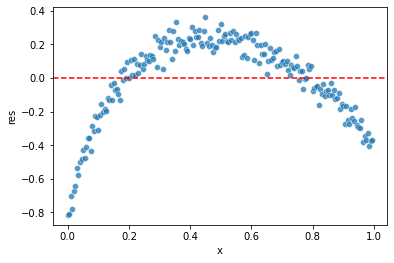

In [310]:
reg = smf.ols('y ~ x', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

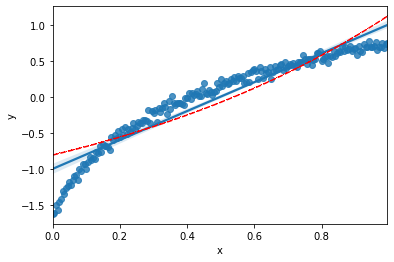

In [311]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], reg.fittedvalues, 'r,--')

#### Ajustando uma função logaritmica

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 3.101e+04
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.56e-219
Time:                        12:55:33   Log-Likelihood:                 322.60
No. Observations:                 200   AIC:                            -641.2
Df Residuals:                     198   BIC:                            -634.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6631      0.005    130.

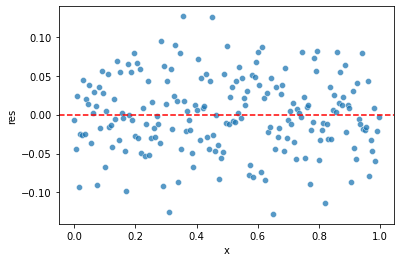

In [312]:
reg = smf.ols('y ~ x', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

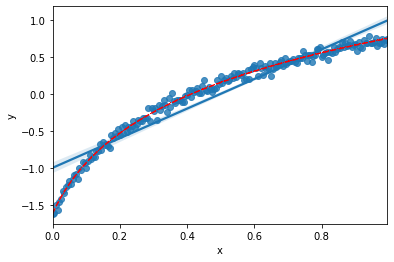

In [313]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], reg.fittedvalues, 'r,--')